# Problem Background

### AirBnB Pricing in Bergamo, Italy
<img src='https://media.tacdn.com/media/attractions-content--1x-1/0f/53/45/7e.jpg' />

>**What is the problem we are trying to solve?**<br>
>We want to better understand which property characteristics are most predictive of listing prices<br><br>
>**Why is it important?  Who cares?**<br>
>Real-estate investors would probably care - there's a lot of competition for rentals and they would probably benefit from some data analysis that would help them know where to focus their attention<br><br>
>**What are the possible actions that could be taken as a result of this work?**<br>
>Property owners might change how the manage existing properities.  New investors might use our analysis to decide which properties to buy<br><br>
>**Who are the key stakeholders?**<br>
>Property owners, real estate investors<br><br>
>**How do we define success?**<br>
>ML & Stats stories - prediction accuracy + storytelling with hypothesis testing results

# Project Dependencies

In [311]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Data Prep

- [ ] Initial Evaluation
- [ ] Initial Cleanup - dupes, missing values
- [ ] Distributions/ranges
- [ ] Outlier Detection & Treatment
- [ ] Feature Transformations
- [ ] Feature Selection
- [ ] Final Prep before ML - Train/Test Splitting

><h3>Initial Evaluation </h3>
Read in the data and try to make sense of it

In [312]:
df = pd.read_csv('Bergamo_Italy_AirBnB_cleaned.csv')
df.tail()

,price,days_as_host,about_info,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,accommodates,bathrooms,shared_bath,bedrooms,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,license,instant_bookable,reviews_per_month
2581,113.0,4655,1,within an hour,100%,100%,f,5.0,t,f,other,Entire home/apt,4,2.0,0,2.0,2.0,3,28,13,1,5.0,NaN,t,0.09
2582,95.0,4655,1,within an hour,100%,100%,f,5.0,t,f,other,Entire home/apt,3,1.0,0,1.0,3.0,3,28,31,1,3.0,NaN,t,0.05
2583,102.0,44809,0,unknown,NaN,NaN,NaN,NaN,NaN,NaN,other,Entire home/apt,3,1.0,0,1.0,2.0,1,1125,216,195,4.9,016190-CNI-00002,t,2.70
2584,35.0,44809,0,unknown,NaN,NaN,NaN,NaN,NaN,NaN,other,Entire home/apt,4,1.0,0,2.0,3.0,6,30,359,0,NaN,NaN,f,NaN
2585,74.0,44809,0,unknown,NaN,NaN,NaN,NaN,NaN,NaN,Predore,Entire home/apt,3,1.0,0,NaN,2.0,1,28,360,2,5.0,NaN,t,0.19


>**Observations:**<br>
>>**2586 Records**<br><br>
>>**Target:** The most obvious candidate is **price**<br>
>>- Other possibiities for prediction: some metric reflecting "utilization" or future availability.  Why are some properties more readily available (less desirable) and others are not?  However, for this focus, I would prefer to have past data on property utilization.  In this dataset we only have pending availability - we have no information on past utilization.
<br><br>


| Feature          	| Thoughts/Expectations                     	|
|------------------	|-------------------------------------------	|
| days_as_host:    	| proxy for experience (+)                  	|
| about_info:      	| indicator (neutral)                       	|
| h_response_time: 	| not sure this will impact price (neutral) 	|
| h_response_rate: 	| another feature I think will be neutral   	|
| h_acceptance...: 	| maybe (-) on price                        	|
| superhost:       	| would think (+) on price                  	|
| listings_count:  	| another proxy for experience (+)          	|
| profile_pic:     	| shouldn't matter for price                	|
| identity_ver:    	| shouldn't matter???                       	|
| neighbourhood:   	| will matter if geographic coverage high   	|
| room_type:       	| should see differences home/apt           	|
| rooms etc:       	| expect signif +++ correlations            	|
| availability:    	| could go either way                       	|
| reviews:         	| if reviews are high I expect (+)          	|
| rating:          	| should be +++                             	|
| license:         	| doubt this matters                        	|
| instant_book:    	| doubt this matters                        	|
| review/month:    	| not sure about this one                   	|

In [313]:
df.dtypes

price                     float64
days_as_host                int64
about_info                  int64
host_response_time         object
host_response_rate         object
host_acceptance_rate       object
host_is_superhost          object
host_listings_count       float64
host_has_profile_pic       object
host_identity_verified     object
neighbourhood_cleansed     object
room_type                  object
accommodates                int64
bathrooms                 float64
shared_bath                 int64
bedrooms                  float64
beds                      float64
minimum_nights              int64
maximum_nights              int64
availability_365            int64
number_of_reviews           int64
review_scores_rating      float64
license                    object
instant_bookable           object
reviews_per_month         float64
dtype: object

In [314]:
df.isnull().sum()

price                        0
days_as_host                 0
about_info                   0
host_response_time           0
host_response_rate         322
host_acceptance_rate       232
host_is_superhost            3
host_listings_count          3
host_has_profile_pic         3
host_identity_verified       3
neighbourhood_cleansed       0
room_type                    0
accommodates                 0
bathrooms                    3
shared_bath                  0
bedrooms                   100
beds                        42
minimum_nights               0
maximum_nights               0
availability_365             0
number_of_reviews            0
review_scores_rating       512
license                   2063
instant_bookable             0
reviews_per_month          512
dtype: int64

In [315]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,2586.0,NaN,NaN,NaN,107.984919,423.305487,9.0,52.0,74.0,107.0,15960.0
days_as_host,2586.0,NaN,NaN,NaN,2036.022815,1765.169916,73.0,1241.0,2053.5,2708.0,44809.0
about_info,2586.0,NaN,NaN,NaN,0.450889,0.497679,0.0,0.0,0.0,1.0,1.0
host_response_time,2586,5,within an hour,1607,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,2264,42,100%,1797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_acceptance_rate,2354,79,100%,1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_is_superhost,2583,2,f,2061,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_listings_count,2583.0,NaN,NaN,NaN,8.799845,64.249404,0.0,1.0,1.0,4.0,1869.0
host_has_profile_pic,2583,2,t,2516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_identity_verified,2583,2,t,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>**Note:**<br>
>- we've got a lot of categorical variables to look at and transform to numerical features at some point
>- we clearly need to take care of some issues with missing values
>> We're not in bad shape in terms of data - we can afford to drop some records
>> For now, I'm going to drop all records with missing values except for those determined by the license var.  I'm actually going to drop the license variable entirely because it's quite difficult to make sense of without a lot of research.  AirBnb docs suggest some areas and local municipalities require licenses whereas others do not.

>**Pros and Cons of Missing Value Decisions:**<br>
>1. **drop**: 
>2. **simple fill** (e.g. mean or median): 
>3. **complex fill** (e.g. median of similar listings): 

In [316]:
# Decided to drop license after doing a little research on airbnb - doesn't seem related to price in any intuitive way
df = df.drop('license',axis=1)

# drop all rows that contain missing values
df = df.dropna()

In [317]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1737.0,95.492228,201.747404,9.00,54.00,75.00,107.00,7999.0
days_as_host,1737.0,2074.739781,985.453827,83.00,1320.00,2162.00,2794.00,4655.0
about_info,1737.0,0.479562,0.499726,0.00,0.00,0.00,1.00,1.0
host_listings_count,1737.0,7.515832,56.449295,0.00,1.00,2.00,4.00,1537.0
accommodates,1737.0,4.196315,2.138367,1.00,3.00,4.00,5.00,16.0
bathrooms,1737.0,1.223949,0.655702,0.00,1.00,1.00,1.00,13.5
shared_bath,1737.0,0.069085,0.253671,0.00,0.00,0.00,0.00,1.0
bedrooms,1737.0,1.548071,0.870085,1.00,1.00,1.00,2.00,12.0
beds,1737.0,2.756477,2.040770,1.00,1.00,2.00,4.00,37.0
minimum_nights,1737.0,2.469775,3.505317,1.00,1.00,2.00,3.00,45.0


><h3>Closer Look at Numerical Vars </h3>
Let's look at central tendencies, ranges and distributions for numeric variables after checking for dupes and missing values
<br>
>But first, we need to change two mis-classed variables to numerics

In [318]:
df['host_response_rate'] = df['host_response_rate'].str.replace("%","").astype(int)
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace("%","").astype(int)

In [319]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_temp = df.select_dtypes(include=numerics)

In [320]:
pd.DataFrame(dict(mean = df_temp.mean().round(2),
                  median = df_temp.median().round(2),
                  std_dev = df_temp.std().round(2),
                  min_val = df_temp.min().round(2),
                  max_val = df_temp.max().round(2),
                  missing_vals = df_temp.isnull().sum()
                  
                 ))

,mean,median,std_dev,min_val,max_val,missing_vals
price,95.49,75.00,201.75,9.00,7999.0,0
days_as_host,2074.74,2162.00,985.45,83.00,4655.0,0
about_info,0.48,0.00,0.50,0.00,1.0,0
host_response_rate,95.25,100.00,15.10,0.00,100.0,0
host_acceptance_rate,85.42,98.00,25.07,0.00,100.0,0
host_listings_count,7.52,2.00,56.45,0.00,1537.0,0
accommodates,4.20,4.00,2.14,1.00,16.0,0
bathrooms,1.22,1.00,0.66,0.00,13.5,0
shared_bath,0.07,0.00,0.25,0.00,1.0,0
bedrooms,1.55,1.00,0.87,1.00,12.0,0


>For continuous numeric features - how can you tell above where we have problems with outliers?<br>
>Any clear hints?

<AxesSubplot:xlabel='price', ylabel='Count'>

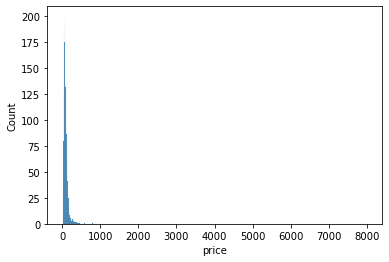

In [321]:
sns.histplot(df_temp['price'])

/Users/feedertree/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='price'>

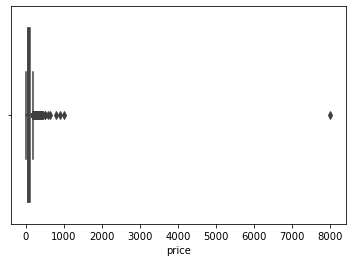

In [322]:
sns.boxplot(df_temp['price'])

In [323]:
df_temp.sort_values(by='price',ascending=False).iloc[0:10,:]

,price,days_as_host,about_info,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bathrooms,shared_bath,bedrooms,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,reviews_per_month
1721,7999.0,2522,0,99,98,32.0,3,1.0,0,1.0,2.0,1,30,0,29,4.83,0.40
292,1000.0,598,0,100,100,1.0,10,8.0,0,6.0,6.0,7,27,346,2,5.00,0.18
888,894.0,1551,1,100,95,2.0,16,13.5,0,12.0,37.0,2,30,306,10,5.00,0.20
2041,800.0,2833,0,100,20,4.0,9,3.0,0,3.0,9.0,1,1125,0,19,4.94,0.21
807,650.0,1453,1,70,61,4.0,12,5.0,0,5.0,11.0,2,15,312,6,5.00,0.16
2550,583.0,4072,0,100,93,16.0,14,4.0,0,4.0,6.0,1,29,361,6,4.83,0.17
2521,500.0,3837,1,100,71,1.0,16,6.0,0,9.0,20.0,2,30,237,44,4.98,0.51
1618,500.0,2403,0,100,100,15.0,5,2.0,0,2.0,3.0,1,28,126,11,5.00,0.91
2444,450.0,3527,0,33,0,3.0,9,1.0,0,2.0,8.0,3,1125,358,2,4.50,0.03
2285,440.0,3158,1,100,55,3.0,16,3.5,0,6.0,14.0,1,140,349,6,4.33,0.47


**Let's see a pic of our 8,000 per night listing.  Looks NICE! However, I just checked the listing and the nightly rate is listed as 300...not 8,000.  Clearly the 8,000 is wrong**
You could delete this one or perhaps enter the more correct listing price of 300.

<img src='https://a0.muscache.com/im/pictures/miso/Hosting-629326735752936789/original/c93183f6-d9f9-420b-bc93-7bb066676128.jpeg?im_w=1200' />

>**Decision:**<br>
Drop all records where listing price is 1,000 or greater

In [324]:
df_temp = df_temp[df_temp['price'] < 1000]

In [325]:
pd.DataFrame(dict(mean = df_temp.mean().round(2),
                  median = df_temp.median().round(2),
                  std_dev = df_temp.std().round(2),
                  min_val = df_temp.min(),
                  max_val = df_temp.max(),
                  missing_vals = df_temp.isnull().sum()
                  
                 ))

,mean,median,std_dev,min_val,max_val,missing_vals
price,90.42,75.00,65.02,9.00,894.0,0
days_as_host,2075.33,2162.00,985.33,83.00,4655.0,0
about_info,0.48,0.00,0.50,0.00,1.0,0
host_response_rate,95.25,100.00,15.11,0.00,100.0,0
host_acceptance_rate,85.40,98.00,25.08,0.00,100.0,0
host_listings_count,7.51,2.00,56.48,0.00,1537.0,0
accommodates,4.19,4.00,2.13,1.00,16.0,0
bathrooms,1.22,1.00,0.64,0.00,13.5,0
shared_bath,0.07,0.00,0.25,0.00,1.0,0
bedrooms,1.55,1.00,0.86,1.00,12.0,0


<AxesSubplot:xlabel='host_listings_count'>

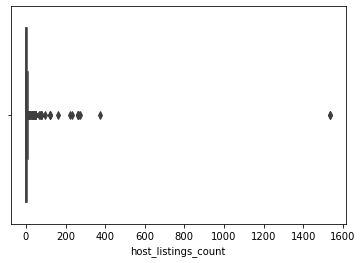

In [326]:
sns.boxplot(x='host_listings_count',data=df_temp)

In [327]:
df_temp.sort_values(by='host_listings_count',ascending=False)

,price,days_as_host,about_info,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bathrooms,shared_bath,bedrooms,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,reviews_per_month
589,45.0,1172,1,100,100,1537.0,4,2.0,0,2.0,2.0,1,28,330,14,4.93,0.59
588,82.0,1172,1,100,100,1537.0,5,2.0,0,2.0,5.0,1,28,365,3,4.67,0.09
1297,102.0,2069,1,100,100,372.0,4,1.0,0,1.0,3.0,1,28,365,1,5.00,0.03
1309,105.0,2091,1,100,89,271.0,5,1.0,0,2.0,4.0,1,1125,365,2,4.50,0.06
233,132.0,482,1,100,100,261.0,6,2.0,0,2.0,3.0,1,1125,314,5,3.40,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,40.0,3021,1,81,50,0.0,4,1.0,1,1.0,3.0,1,365,330,5,4.60,5.00
607,120.0,1183,0,100,100,0.0,6,2.0,0,3.0,5.0,3,28,233,69,4.99,2.01
608,80.0,1183,0,100,100,0.0,4,2.0,0,2.0,2.0,5,28,341,6,5.00,0.73
614,48.0,1188,0,60,96,0.0,4,1.5,0,2.0,3.0,5,1125,207,15,4.87,0.99


>**Decision:**<br>
Dropping records where host listings is > 200.  It's safe to assume these properties are owned by MASSIVE real estate holding companies.  I assume the dynamics of their pricing decisions is different than it is for MOST hosts, who own fewer properties.

In [328]:
df_temp = df_temp[df_temp['host_listings_count'] < 200]

In [329]:
pd.DataFrame(dict(mean = df_temp.mean().round(2),
                  median = df_temp.median().round(2),
                  std_dev = df_temp.std().round(2),
                  min_val = df_temp.min(),
                  max_val = df_temp.max(),
                  missing_vals = df_temp.isnull().sum()
                  
                 ))

,mean,median,std_dev,min_val,max_val,missing_vals
price,90.34,75.00,65.19,9.00,894.0,0
days_as_host,2081.31,2176.50,984.19,83.00,4655.0,0
about_info,0.48,0.00,0.50,0.00,1.0,0
host_response_rate,95.22,100.00,15.15,0.00,100.0,0
host_acceptance_rate,85.32,98.00,25.14,0.00,100.0,0
host_listings_count,4.38,2.00,11.16,0.00,164.0,0
accommodates,4.19,4.00,2.14,1.00,16.0,0
bathrooms,1.22,1.00,0.64,0.00,13.5,0
shared_bath,0.07,0.00,0.25,0.00,1.0,0
bedrooms,1.54,1.00,0.86,1.00,12.0,0


> Let's drop duplicates (if any) and move on for now

In [330]:
# Let's be done with our df_temp dataframe and go back to our original df...but we need to update it
df = df[df['price'] < 1000]
df = df[df['host_listings_count'] < 200]

In [331]:
# drop any duplicate records
df.drop_duplicates(inplace=True)

><h3>Quick look at correlations</h3>
Now that we've cleaned up our numerical variables, let's take a quick look at the correlation matrix of our numerical variables to see if we can spot the most promising feature to move forward with

In [332]:
df.select_dtypes(include=numerics).corr()

,price,days_as_host,about_info,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bathrooms,shared_bath,bedrooms,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,reviews_per_month
price,1.000000,0.041933,0.019393,-0.013609,0.019470,0.141186,0.475026,0.545022,-0.150263,0.501865,0.471344,-0.062230,-0.054394,-0.019348,-0.127449,0.059257,-0.124952
days_as_host,0.041933,1.000000,0.382090,-0.023677,-0.133654,0.157253,0.066735,0.070780,0.015928,0.086555,0.072813,0.038458,0.100795,0.041702,0.180587,-0.036973,-0.125145
about_info,0.019393,0.382090,1.000000,-0.005121,0.035246,0.185749,0.026886,0.051590,0.035524,0.058742,0.034984,0.028691,-0.006443,-0.012012,0.114485,0.006739,-0.019231
host_response_rate,-0.013609,-0.023677,-0.005121,1.000000,0.353816,0.032259,-0.045839,-0.029237,-0.034774,-0.055362,-0.057029,-0.071878,-0.061265,-0.071207,0.096097,0.200739,0.146345
host_acceptance_rate,0.019470,-0.133654,0.035246,0.353816,1.000000,0.088192,-0.028281,-0.028038,-0.049524,-0.036279,-0.081629,-0.106670,-0.096021,-0.120656,0.161895,0.208442,0.256328
host_listings_count,0.141186,0.157253,0.185749,0.032259,0.088192,1.000000,0.075309,0.029082,-0.041072,0.043789,-0.012112,0.147898,-0.000300,0.005119,-0.040818,-0.053734,-0.066460
accommodates,0.475026,0.066735,0.026886,-0.045839,-0.028281,0.075309,1.000000,0.513128,-0.176422,0.762493,0.780189,0.012966,0.026850,0.021398,-0.060363,-0.021234,-0.132018
bathrooms,0.545022,0.070780,0.051590,-0.029237,-0.028038,0.029082,0.513128,1.000000,0.008097,0.633077,0.574585,0.005256,-0.030839,-0.011608,0.081581,0.022444,-0.020976
shared_bath,-0.150263,0.015928,0.035524,-0.034774,-0.049524,-0.041072,-0.176422,0.008097,1.000000,-0.121710,-0.101756,0.017521,0.022700,0.023095,0.200149,-0.003524,0.183246
bedrooms,0.501865,0.086555,0.058742,-0.055362,-0.036279,0.043789,0.762493,0.633077,-0.121710,1.000000,0.746682,0.073295,0.023563,-0.043708,-0.088373,-0.023656,-0.154712


>**Most highly correlated features:**<br>
>- bathrooms (+)
>- bedrooms (+)
>- shared_bath (-)
>- host_listings_count (+)
>- number_of_reviews (-)
>- review_scores_rating (+)
<br>
<br>
>dropping highly redundent features - those that are highly correlated with other features (choose one)
>- beds (highly correlated with bedrooms)
>- accommodates (highly correlated with bedrooms)


In [333]:
df = df.drop(['beds','accommodates'], axis=1)

>Let's **LOOK** at scatterplots involving price and seemingly uncorrelated vars...just to make sure we're not missing anything
>- days_as_host (DROP)
>- about_info
>- host_response_rate
>- host_acceptance_rate
>- minimum_nights
>- availability_365

<AxesSubplot:xlabel='availability_365', ylabel='price'>

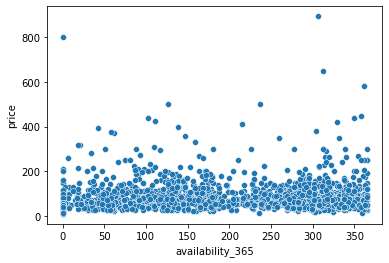

In [334]:
sns.scatterplot(x='availability_365',y='price',data=df)

In [335]:
df = df.drop(['days_as_host','about_info','host_response_rate','host_acceptance_rate',
              'availability_365','maximum_nights'], axis=1)

><h3>Categorical Variables</h3>
Let's take a close look at our list of categorical variables and get these cleaned up and ready for modeling

In [336]:
categorical = ['object']

df_temp = pd.merge(df['price'],df.select_dtypes(include=categorical),left_index=True,right_index=True)

In [337]:
df_temp.head()

,price,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,instant_bookable
11,71.0,within a few hours,f,f,t,Bergamo,Private room,f
17,55.0,within an hour,f,f,t,Bergamo,Entire home/apt,t
24,70.0,within an hour,f,t,t,Bergamo,Entire home/apt,f
25,83.0,within an hour,f,t,t,Lovere,Entire home/apt,t
26,69.0,within an hour,f,t,t,Lovere,Private room,t


In [338]:
# How many unique values
df_temp['host_response_time'].unique()

array(['within a few hours', 'within an hour', 'within a day',
       'a few days or more'], dtype=object)

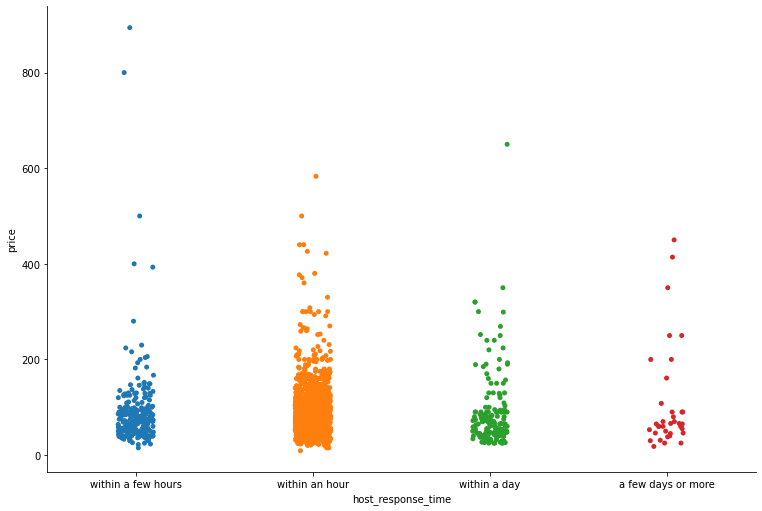

In [339]:
sns.catplot(x="host_response_time", y="price", data=df_temp, height=7,aspect=1.5)

In [340]:
global_mean = df_temp['price'].mean()

for col in df_temp.columns[1:]:
    df_group = df_temp.groupby(by=col).price.agg(['mean']).round(2)
    df_group['diff'] = (df_group['mean'] - global_mean).round(2)
    display(df_group)

,mean,diff
host_response_time,,
a few days or more,106.41,16.07
within a day,90.72,0.38
within a few hours,88.53,-1.81
within an hour,90.20,-0.14


,mean,diff
host_is_superhost,,
f,90.82,0.48
t,89.10,-1.24


,mean,diff
host_has_profile_pic,,
f,83.30,-7.04
t,90.47,0.13


,mean,diff
host_identity_verified,,
f,79.01,-11.33
t,92.91,2.57


,mean,diff
neighbourhood_cleansed,,
Bergamo,92.32,1.98
Lovere,102.11,11.77
Predore,117.83,27.49
Riva di Solto,129.56,39.22
Sarnico,102.32,11.98
other,83.26,-7.08


,mean,diff
room_type,,
Entire home/apt,95.54,5.20
Hotel room,106.81,16.47
Private room,68.25,-22.09
Shared room,29.80,-60.54


,mean,diff
instant_bookable,,
f,83.84,-6.50
t,95.17,4.83


>**Decision:**<br>
drop super_host flag - keep other categorical vars for modeling

In [341]:
df = df.drop(['host_is_superhost'], axis=1)

In [342]:
df.columns

Index(['price', 'host_response_time', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'room_type', 'bathrooms', 'shared_bath',
       'bedrooms', 'minimum_nights', 'number_of_reviews',
       'review_scores_rating', 'instant_bookable', 'reviews_per_month'],
      dtype='object')

>**Finally - let's convert categorical vars to numerical indicators**

In [343]:
# Flag categorical variables and convert to dummies
cat_vars = ['host_has_profile_pic','host_identity_verified','neighbourhood_cleansed',
            'room_type','instant_bookable','host_response_time'
           ]

for var in cat_vars:
    df[var] = df[var].astype("category")

df = pd.get_dummies(df,columns=cat_vars, prefix_sep='_')

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1724 entries, 11 to 2582
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   price                                  1724 non-null   float64
 1   host_listings_count                    1724 non-null   float64
 2   bathrooms                              1724 non-null   float64
 3   shared_bath                            1724 non-null   int64  
 4   bedrooms                               1724 non-null   float64
 5   minimum_nights                         1724 non-null   int64  
 6   number_of_reviews                      1724 non-null   int64  
 7   review_scores_rating                   1724 non-null   float64
 8   reviews_per_month                      1724 non-null   float64
 9   host_has_profile_pic_f                 1724 non-null   uint8  
 10  host_has_profile_pic_t                 1724 non-null   uint8  
 11  hos

In [348]:
df = df.drop(['host_has_profile_pic_f','host_identity_verified_f','neighbourhood_cleansed_other',
              'room_type_Hotel room','instant_bookable_f','host_response_time_a few days or more'
             ],axis=1)

In [350]:
df.columns = ['price', 'host_listings_count', 'bathrooms', 'shared_bath', 'bedrooms',
       'minimum_nights', 'number_of_reviews', 'review_scores_rating',
       'reviews_per_month', 'host_has_profile_pic',
       'host_identity_verified', 'Bergamo_area',
       'Lovere_area', 'Predore_area',
       'Riva di Solto_area',
       'Sarnico_area', 'entire_property',
       'private room', 'shared room', 'instant_bookable',
       'response_in_day',
       'response_in_hours',
       'response_in_hour']

In [351]:
df.head()

,price,host_listings_count,bathrooms,shared_bath,bedrooms,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month,host_has_profile_pic,host_identity_verified,Bergamo_area,Lovere_area,Predore_area,Riva di Solto_area,Sarnico_area,entire_property,private room,shared room,instant_bookable,response_in_day,response_in_hours,response_in_hour
11,71.0,0.0,1.0,1,1.0,1,1,5.00,1.00,0,1,1,0,0,0,0,0,1,0,0,0,1,0
17,55.0,0.0,1.0,0,1.0,1,2,5.00,2.00,0,1,1,0,0,0,0,1,0,0,1,0,0,1
24,70.0,0.0,1.0,0,1.0,1,6,4.33,6.00,1,1,1,0,0,0,0,1,0,0,0,0,0,1
25,83.0,13.0,1.0,0,2.0,2,9,4.89,0.19,1,1,0,1,0,0,0,1,0,0,1,0,0,1
26,69.0,13.0,1.0,0,1.0,1,27,4.78,0.55,1,1,0,1,0,0,0,0,1,0,1,0,0,1
